# Capítulo 1 - Relações Espaciais

## Introdução

<p style="text-align: justify">
    As relações espaciais são fundamentais na análise de dados geográficos e no entendimento das dinâmicas espaciais que ocorrem no mundo ao redor. Elas descrevem como diferentes objetos ou fenômenos se relacionam entre si no espaço, influenciando diretamente a percepção, a interação e o planejamento no ambiente físico.
</p>

<p style="text-align: justify">
    Essas relações são observadas em diversos contextos, desde a proximidade entre cidades e a distribuição de recursos naturais até a interação entre indivíduos em uma rede social. A análise das relações espaciais permite identificar padrões, como a concentração de crimes em determinadas áreas urbanas ou a dispersão de espécies em um ecossistema, e compreender os processos subjacentes que moldam esses padrões.
</p>

<p style="text-align: justify">
    Nesse contexto, destaca-se a Lei de Tobler, a qual afirma que <strong>objetos próximos estão mais relacionados do que aqueles distantes</strong>. Embora isso pareça trivial, muitas abordagens tradicionais de estatísticas e aprendizado de máquina desconsideram essa realidade ao assumirem que os dados são independentes. No entanto, a dependência espacial à qual a Lei de Tobler se refere é uma característica única e valiosa dos dados, reforçando a relevância das relações espaciais em análises precisas e significativas. (Bennet e Vale, 2023).
</p>


## Definindo Relações Espaciais

<p style="text-align: justify">
  Em primeira análise, para definir o que significa estar relacionado no espaço (e às vezes no tempo), é importante levar em consideração que os elementos em um conjunto de dados geográficos podem estar vinculados de várias maneiras. Assim, a fim de explorar as diferentes abordagens, o elemento cuja vizinhança se deseja definir será aqui denominado <strong>característica focal</strong>, como mostrado na Figura 01.
</p>

<br/>

<figure style="text-align: center">
  <h4><strong>Figura 01</strong> - Vizinhança e característica focal.</h4> <br/>
  <img src="./../images/neighborhood.jpg" alt="Vizinhança e característica focal." width="80%"> <br/>
  <figcaption style="text-align: center">Fonte: Adaptado de Bennet e Vale (2023).</figcaption>
</figure>

<br/>

<p style="text-align: justify">
  Nesse panorama, é importante a noção de que as <strong>relações espaciais são representadas por pesos</strong>, os quais podem ser classificados em: 

  <ul style="text-align: justify">
    <li>
      <strong>binários:</strong> que indicam se uma característica está presente ou não na vizinhança da característica focal;
    </li>
    <li>
      <strong>contínuos:</strong> cujas magnitudes determinam a importância da relação ou quão influente é a característica vizinha para a característica focal.
  </ul>

</p>

<p style="text-align: justify">
  A partir dessas informações, as maneiras mais comuns de se definir vizinhança são então apresentadas a seguir.
</p>







### Número de Vizinhos

<p style="text-align: justify">
    Esta abordagem define a vizinhança com base em um <strong>número fixo de vizinhos mais próximos da característica focal</strong>. Nessa perspectiva, é possível que as distâncias entre os elementos variem de acordo com a densidade de características presentes na área de estudo. Quanto mais densa a área, mais próximos os vizinhos estarão da característica focal e, consequentemente, menor a vizinhança. Dessa forma,  ainda que a quantidade de vizinhos especificada pelo usuário seja constante, o tamanho das vizinhanças pode variar bastante, como mostrado na Figura 02.
</p>


<figure style="text-align: center">
  <h4><strong>Figura 02</strong> - Número de vizinhos igual a 4 para áreas com diferentes densidades.</h4> <br/>
  <img src="./../images/neighbors-number.jpg" alt="Número de vizinhos igual a 4 para áreas com diferentes densidades." width="80%"> <br/>
  <figcaption style="text-align: center">Fonte: Bennet e Vale (2023).</figcaption>
</figure>


<p style="text-align: justify">
    Este método, amplamente utilizado devido a sua simplicidade, é também conhecido como <strong>k-vizinhos mais próximos</strong>, em que a constante k representa o número especificado de vizinhos. Além disso, a capacidade de adaptação a diferentes densidades de características confere à referida abordagem a denominação <strong>vizinhança adaptativa</strong>.
</p>





<p style="text-align: justify">
    Agora que a teoria por trás do método do número de vizinhos foi minimamente discutida, é interessante explorar a aplicação dessa técnica na prática, utilizando <strong>Python</strong>. Com tal objetivo, podemos gerar um conjunto de pontos aleatoriamente e encontrar os 5 vizinhos mais próximos para dois elementos quaisquer desse conjunto. Nessa tarefa, é conveniente a utilização de bibliotecas como <strong>numpy</strong> para operações numéricas, <strong>shapely</strong> para lidar com dados geométricos, <strong>geopandas</strong> para manipulação de dados geográficos, <strong>matplotlib</strong> para visualização e <strong> scikit-learn</strong> para aprendizado de máquina.
</p>

<p>
    Uma vez que as ferramentas já foram elencadas, o exemplo é iniciado com a geração aleatória das coordenadas que servirão de base para a contrução dos pontos:
</p>

In [21]:
import numpy as np
import random

np.random.seed(42)
num_points = 30
x_coords = np.random.rand(num_points) * 10
y_coords = np.random.rand(num_points) * 10

<p>
    Em seguida, a partir das coordenadas geradas, os pontos são então construídos:
</p>

In [22]:
from shapely.geometry import Point

points = [Point(x, y) for x, y in zip(x_coords, y_coords)]

<p>
    A partir dos pontos construídos, tem-se a geração de um GeoDataFrame e a definição de um sistema de coordenadas:
</p>

In [23]:
import geopandas as gpd

gdf = gpd.GeoDataFrame(geometry=points)
gdf.crs = "EPSG:4326"

<p>
    Com a plotagem do GeoDataFrame, é ppossível observar os pontos gerados:
</p>

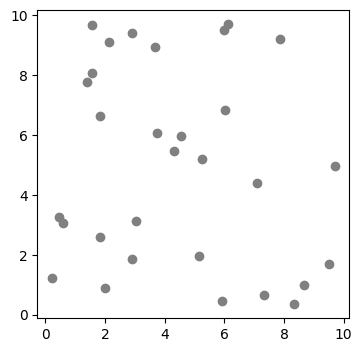

In [38]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(8, 4))
gdf.plot(ax=ax, color='grey')
plt.show()

<p>
    Adiante, tem-se a definição da vizinhança utilizando os 5 vizinhos mais próximos:
</p>

In [25]:
from sklearn.neighbors import NearestNeighbors

k = 5
coords = np.array(list(zip(x_coords, y_coords)))

nbrs = NearestNeighbors(n_neighbors=k+1, algorithm='ball_tree').fit(coords)
distances, indices = nbrs.kneighbors(coords)

<p>
    Como apresentado na descrição do exemplo, os dois pontos cuja vizinhança se deseja definir são aleatoriamente selecionados:
</p>

In [28]:
selected_indices = random.sample(range(num_points), 2)
colors = ['blue', 'green']

<p>
    Enfim, tem-se a visualização da vizinhança para os dois pontos em questão:
</p>

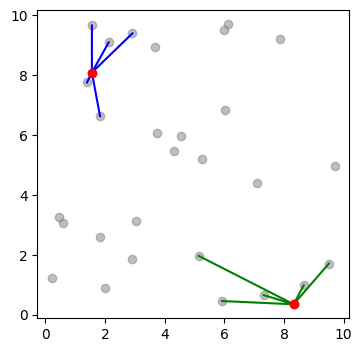

In [35]:
fig, ax = plt.subplots(figsize=(8, 4))

gdf.plot(ax=ax, color='grey', alpha=0.5)
for color, i in zip(colors, selected_indices):
    point = points[i]
    for neighbor_index in indices[i][1:]:
        neighbor_point = points[neighbor_index]
        ax.plot(
            [point.x, neighbor_point.x], 
            [point.y, neighbor_point.y], 
            color=color
        )
    ax.plot(point.x, point.y, 'ro')
plt.show()
